# CMOG Correlations

In [219]:
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_csv('CriticalMineralDepositsGeochemistry - GA-GSC-USGS.csv', low_memory = False)
df.head()

,FID,deposit_uid,deposit_name,deposit_local_id,deposit_environment,deposit_group,deposit_type,primary_commodities,secondary_commodities,all_commodities,...,sample_longitude_wgs84,sample_latitude_wgs84,sample_easting,sample_northing,sample_utm_zone,sample_location_description,location_accuracy,comments,last_update,geometry
0,CriticalMineralDepositsGeochemistry.672862-74156,CAN.ON.06000135,Worthington,469,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-81.4409,46.3906,466101,5137545,17N,NaN,NaN,NaN,2021-06-04,POINT (46.390633 -81.440903)
1,CriticalMineralDepositsGeochemistry.672862-74157,CAN.ON.06000135,Worthington,469,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-81.4409,46.3906,466101,5137545,17N,NaN,NaN,NaN,2021-06-04,POINT (46.390633 -81.440903)
2,CriticalMineralDepositsGeochemistry.672871-74135,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)
3,CriticalMineralDepositsGeochemistry.672872-74136,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)
4,CriticalMineralDepositsGeochemistry.672873-74137,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9553 entries, 0 to 9552
Columns: 340 entries, FID to geometry
dtypes: float64(201), int64(2), object(137)
memory usage: 24.8+ MB


In [221]:
df.shape

(9553, 340)

In [144]:
df[df.values == -9999] #here are no -9999 values like the other datasets

,FID,deposit_uid,deposit_name,deposit_local_id,deposit_environment,deposit_group,deposit_type,primary_commodities,secondary_commodities,all_commodities,...,sample_longitude_wgs84,sample_latitude_wgs84,sample_easting,sample_northing,sample_utm_zone,sample_location_description,location_accuracy,comments,last_update,geometry


In [222]:
df['pd_ppb'].describe()

count     1379.000000
mean      1061.566309
std       5644.343191
min         -8.000000
25%         -1.000000
50%          1.000000
75%         12.000000
max      90700.000000
Name: pd_ppb, dtype: float64

In [223]:
#pd_ppm, 'au_ppb', 'pt_ppm', 'rh_ppm' not available so we calculate them
df['pd_ppm'] = df['pd_ppb'] / 1000
df['au_ppm'] = df['au_ppb'] / 1000
df['pt_ppm'] = df['pt_ppb'] / 1000
df['rh_ppm'] = df['rh_ppb'] / 1000

In [224]:
df.filter(like='ppm').isna().sum()

ag_ppm       3044
al_ppm       7135
as_ppm       4519
b_ppm        7869
ba_ppm       5906
             ... 
ree_y_ppm    7132
pd_ppm       8174
au_ppm       6217
pt_ppm       8173
rh_ppm       9546
Length: 73, dtype: int64

We note many pd, au, pt, rh values are missing. 

In [225]:
#change NAs to 0
df = df.fillna(0)

In [226]:
df[['pd_ppm','au_ppm','pt_ppm','rh_ppm']].describe()

,pd_ppm,au_ppm,pt_ppm,rh_ppm
count,9553.000000,9553.000000,9553.000000,9553.000000
mean,0.153240,4.207993,0.064766,-0.000524
std,2.176057,84.185019,0.848051,0.051156
min,-0.008000,-1.000000,-0.010000,-5.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.084000,0.000000,0.000000
max,90.700000,6570.000000,34.200000,0.001000


In [227]:
#only keep ppm columns
df_ppm = df.filter(like='ppm') 

In [228]:
#also keep coordonates
df_ppm['longitude'] = df['sample_longitude_wgs84']
df_ppm['latitude'] = df['sample_latitude_wgs84']
df_ppm['deposit_group'] = df['deposit_group']

In [229]:
df_ppm.shape

(9553, 76)

## Correlations

In [230]:
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(abs_halve_neg_val)
    
    return df

In [231]:
df_minerals = df_ppm.drop(columns=['latitude', 'longitude', 'deposit_group'])

df_ppm.loc[:, df_minerals.columns] = clean_assays(df_ppm.loc[:,df_minerals.columns])

### VMS

In [157]:
VMS = 'Volcanogenic massive sulfide (VMS)'
VMS = df_ppm[df_ppm['deposit_group'] == VMS]
VMS.shape

(2886, 76)

<AxesSubplot:>

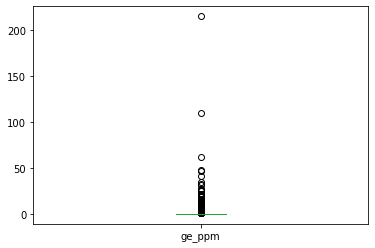

In [158]:
VMS['ge_ppm'].plot(kind='box')

In [159]:
#remove 2 clear outliers 
VMS = VMS[VMS['ge_ppm'] < 100]

<AxesSubplot:>

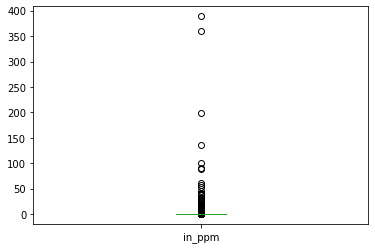

In [160]:
VMS['in_ppm'].plot(kind='box')

In [161]:
#remove 2 clear outliers 
VMS = VMS[VMS['in_ppm'] < 350]

In [183]:
VMS_corr = VMS.corr()

In [185]:
only_ge = VMS_corr['ge_ppm'].sort_values()

In [188]:
only_ge[0:5]

latitude   -0.125422
zn_ppm     -0.068217
se_ppm     -0.028046
cd_ppm     -0.026441
eu_ppm     -0.023563
Name: ge_ppm, dtype: float64

In [192]:
only_ge[-10:]

al_ppm       0.080195
pt_ppm       0.082323
fe_ppm       0.115824
li_ppm       0.124128
pd_ppm       0.125423
longitude    0.126038
ti_ppm       0.191062
s_ppm        0.457723
ge_ppm       1.000000
rh_ppm            NaN
Name: ge_ppm, dtype: float64

In [186]:
only_in = VMS_corr['in_ppm'].sort_values()

In [189]:
only_in[0:5]

latitude   -0.128724
cr_ppm     -0.025449
s_ppm      -0.020405
ga_ppm     -0.019506
zr_ppm     -0.018365
Name: in_ppm, dtype: float64

In [193]:
only_in[-10:]

ree_ppm      0.071511
ree_y_ppm    0.076386
na_ppm       0.077104
k_ppm        0.136133
longitude    0.138283
al_ppm       0.142141
hree_ppm     0.209385
fe_ppm       0.277406
in_ppm       1.000000
rh_ppm            NaN
Name: in_ppm, dtype: float64

### Cobalt deposits 

Co_Deposits = ['Komatiite', 'Ultramafic and (or) mafic-layered intrusion',  'Ultramafic and (or) mafic intrusion', 'Ultramafic and (or) mafic conduit']
Co_Deposits = df[df['deposit_group'].isin(Co_Deposits)]
Co_Deposits.shape#### Cobalt deposits

In [232]:
Co_Deposits = ['Komatiite', 'Ultramafic and (or) mafic-layered intrusion',  'Ultramafic and (or) mafic intrusion', 'Ultramafic and (or) mafic conduit']
Co_Deposits = df_ppm[df_ppm['deposit_group'].isin(Co_Deposits)]
Co_Deposits.shape

(950, 76)

In [233]:
Co_Deposits[Co_Deposits['zn_ppm'] > 300000].shape

(3, 76)

In [234]:
Co_Deposits = Co_Deposits[Co_Deposits['zn_ppm'] < 300000]

<AxesSubplot:>

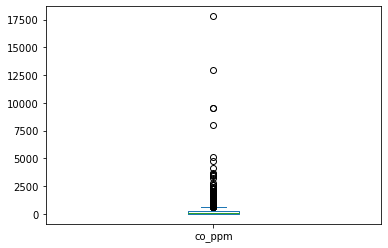

In [235]:
Co_Deposits['co_ppm'].plot(kind='box')

In [236]:
#remove outliers very far from the rest
Co_Deposits = Co_Deposits[Co_Deposits['co_ppm'] < 7500]

In [237]:
Co_Deposits_corr = Co_Deposits.corr()

In [238]:
only_co = Co_Deposits_corr['co_ppm'].sort_values()

In [239]:
only_co[1:5]

s_ppm       -0.079833
ree_y_ppm   -0.077451
sc_ppm      -0.073970
cr_ppm      -0.067745
Name: co_ppm, dtype: float64

In [240]:
only_co[-10:]

in_ppm      0.083771
bi_ppm      0.142677
pt_ppm      0.160318
tl_ppm      0.162724
se_ppm      0.292625
fe_ppm      0.342642
latitude    0.384801
ni_ppm      0.729625
co_ppm      1.000000
rh_ppm           NaN
Name: co_ppm, dtype: float64

In [244]:
only_minedex_co = Co_Deposits[['ni_ppm','cu_ppm','co_ppm', 'pd_ppm', 'au_ppm','pt_ppm', 'rh_ppm', 'fe_ppm', 's_ppm', 'ag_ppm', 'latitude', 'longitude']].corr()

Strongest collections are with Nickel, latitude, iron,se, tl, Pt, and Bi. 

In [245]:
Co_Deposits['rh_ppm'].describe() #rh is 0 because only 0s in the data

count    942.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: rh_ppm, dtype: float64

In [246]:
only_minedex_co

,ni_ppm,cu_ppm,co_ppm,pd_ppm,au_ppm,pt_ppm,rh_ppm,fe_ppm,s_ppm,ag_ppm,latitude,longitude
ni_ppm,1.000000,0.050393,0.729625,0.088031,0.190949,0.202376,NaN,0.244737,-0.039457,0.007194,0.252380,-0.272396
cu_ppm,0.050393,1.000000,0.004566,0.530901,0.009310,0.325321,NaN,-0.019729,-0.065535,0.106730,0.413760,-0.436696
co_ppm,0.729625,0.004566,1.000000,0.042468,0.070199,0.160318,NaN,0.342642,-0.079833,-0.006236,0.384801,-0.410017
pd_ppm,0.088031,0.530901,0.042468,1.000000,0.051901,0.399874,NaN,-0.058665,-0.033264,0.026932,0.257973,-0.270058
au_ppm,0.190949,0.009310,0.070199,0.051901,1.000000,0.119678,NaN,-0.028059,0.061193,0.007150,0.055297,-0.031277
pt_ppm,0.202376,0.325321,0.160318,0.399874,0.119678,1.000000,NaN,-0.055183,-0.037083,0.026206,0.252047,-0.276671
rh_ppm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fe_ppm,0.244737,-0.019729,0.342642,-0.058665,-0.028059,-0.055183,NaN,1.000000,0.007688,0.041269,-0.002936,0.002623
s_ppm,-0.039457,-0.065535,-0.079833,-0.033264,0.061193,-0.037083,NaN,0.007688,1.000000,-0.019875,-0.065231,0.080582
ag_ppm,0.007194,0.106730,-0.006236,0.026932,0.007150,0.026206,NaN,0.041269,-0.019875,1.000000,0.098736,-0.045718


In [247]:
only_minedex_co.to_csv('Co_correlations_CMOG.csv')